https://www.tensorflow.org/tutorials/images/data_augmentation

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-11 00:39:50.092984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-11 00:39:50.093335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Text(0.5, 1.0, '(150, 150, 3)')

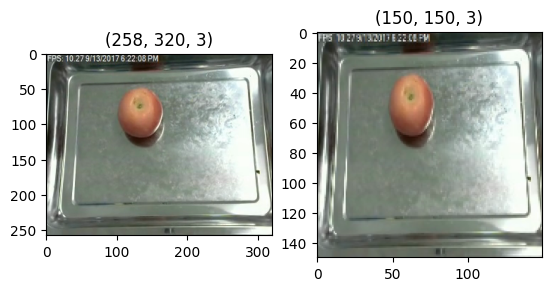

In [1]:
import tensorflow as tf
from keras import layers
import matplotlib.pyplot as plt
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(150,150),
    layers.Rescaling(1./255)
])
raw = tf.io.read_file('../data/Apple/Apple A/Apple 509.png')
image = tf.image.decode_png(raw, channels=3)
result = resize_and_rescale(image)
fig, axes = plt.subplots(1,2)
axes[0].imshow(image)
axes[0].set_title(image.shape)
axes[1].imshow(result)
axes[1].set_title(result.shape)

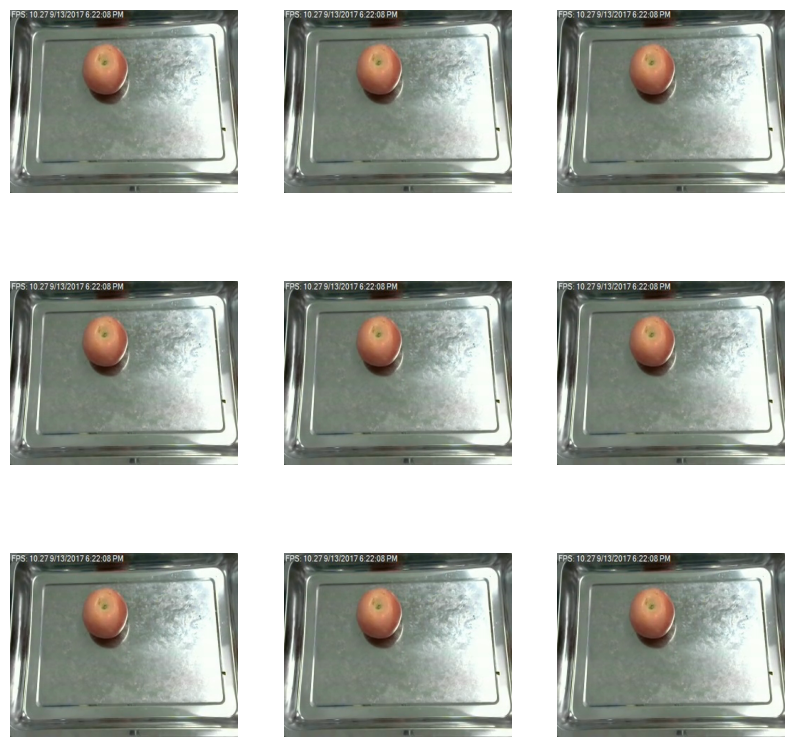

In [5]:
# tf.get_logger().setLevel('ERROR')

data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),
    # layers.RandomFlip("horizontal_and_vertical"),
    # layers.RandomRotation(0.2),
    # layers.RandomContrast(factor=0.2)
    # layers.RandomBrightness(0.2, value_range=(0,1))
])
raw = tf.io.read_file('../data/Apple/Apple A/Apple 509.png')
image = tf.image.decode_png(raw, channels=3)
image = tf.cast(tf.expand_dims(image, 0), tf.float32)
plt.figure(figsize=(10,10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")